## File handling - non-native files

This notebook discusses how load data and metadata from various non-py4DSTEM file formats.  It includes:

1. Default: reading with hyperspy
2. Memory mapping dm files
3. Reading empad files
4. Reading Gatan K2IS Binaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

import py4DSTEM
from py4DSTEM.file.io import read

#### 1. Read with hyperspy

In [2]:
fp = "/home/ben/Data/20180830_zeltman_smallsampledatasets/1_10x10 ss=100 alpha=p48 spot 11 cl=1200 300kV RT bin=4 0p5sec.dm3"
datacube = read(fp)
datacube.set_scan_shape(10,10)

/home/ben/Data/20180830_zeltman_smallsampledatasets/1_10x10 ss=100 alpha=p48 spot 11 cl=1200 300kV RT bin=4 0p5sec.dm3 is not a py4DSTEM file.
Reading with hyperspy...


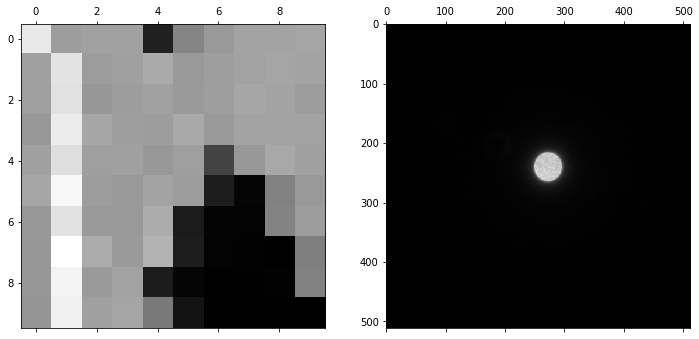

In [3]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
ax1.matshow(np.average(datacube.data4D,axis=(2,3)))
ax2.matshow(datacube.data4D[5,5,:,:])
plt.show()

#### 2. Memory-map a dm file 

In [4]:
#fp = "/home/ben/Data/20190227_e_counting__AmSi_HamishBrown/Capture33.dm4"
fp = "/home/ben/Data/20190409_Mecklenburg/S1821D_011_m0pt00mA4.dm4"
datacube = read(fp, load='dmmmap')

/home/ben/Data/20190409_Mecklenburg/S1821D_011_m0pt00mA4.dm4 is not a py4DSTEM file.
Memory mapping a dm file...


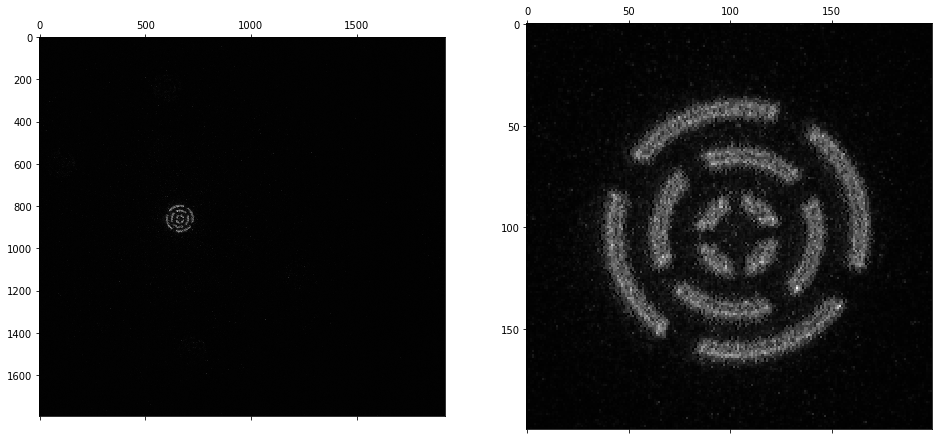

In [5]:
Rx,Ry = 50,50
rad = 100
sigma=50

x0,y0 = np.unravel_index(np.argmax(gaussian_filter(datacube.data4D[Rx,Ry,:,:],sigma)),(datacube.Q_Nx,datacube.Q_Ny))
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.matshow(datacube.data4D[Rx,Ry,:,:])
ax2.matshow(datacube.data4D[Rx,Ry,int(x0-rad):int(x0+rad),int(y0-rad):int(y0+rad)])
plt.show()

#### 3. Read empad data

In [8]:
fp = "/home/ben/Data/20190409_PMNPT_RohanDhall/PMNPT_RohanDhall_scan_3_x128_y128.raw"
datacube = read(fp, load='empad')

/home/ben/Data/20190409_PMNPT_RohanDhall/PMNPT_RohanDhall_scan_3_x128_y128.raw is not a py4DSTEM file.
Reading an EMPAD file...


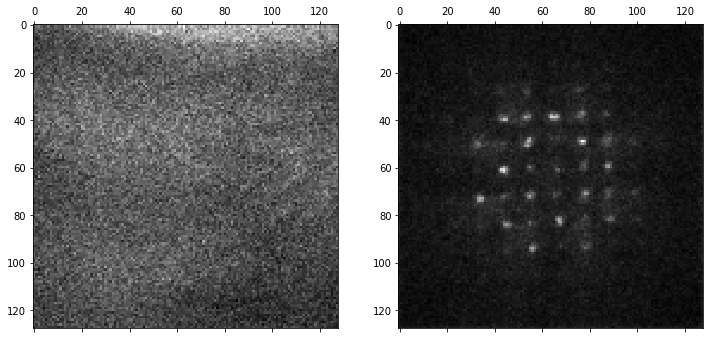

In [9]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,12))
ax1.matshow(np.average(datacube.data4D,axis=(0,1)))
ax1.matshow(datacube.data4D[:,:,50,50])
ax2.matshow(datacube.data4D[50,50,:128,:])
plt.show()

#### 4. Read Gatan K2IS Binary Data

In addition to the basic modules, reading Gatan files also requires `numba` and `ncempy`:
```python
pip install ncempy
conda install numba
```

In [2]:
fp = '/Users/sez/Downloads/gatan-bin-test/small/' # This can be the folder, the *.gtg, or any of the *.bin files.
datacube = read(fp,'gatan_bin')

/Users/sez/Downloads/gatan-bin-test/small/ is not a py4DSTEM file.
Reading Gatan binary files...


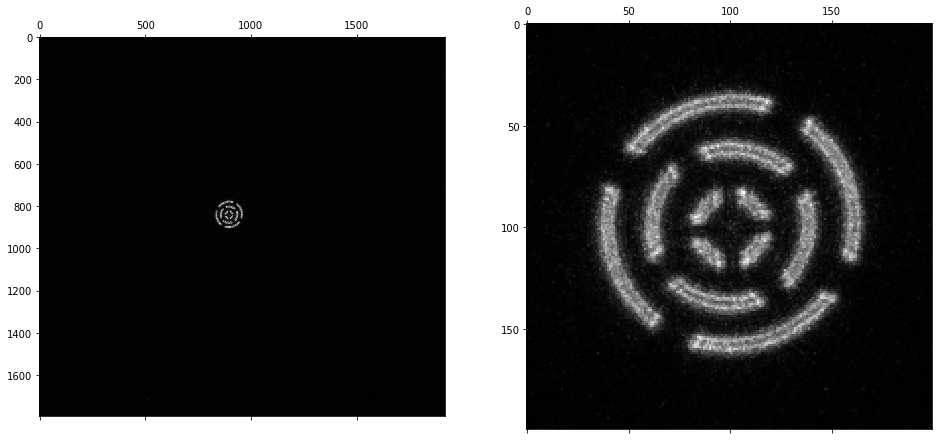

In [4]:
Rx,Ry = 5,5
rad = 100
sigma=50

x0,y0 = np.unravel_index(np.argmax(gaussian_filter(datacube.data4D[Rx,Ry,:,:],sigma)),(datacube.Q_Nx,datacube.Q_Ny))
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.matshow(datacube.data4D[Rx,Ry,:,:])
ax2.matshow(datacube.data4D[Rx,Ry,int(x0-rad):int(x0+rad),int(y0-rad):int(y0+rad)])
plt.show()